Import necessary libraries for visualisation, model fitting and for dataset operations

In [ ]:
"""
Option 1 (Predicting the severity of road accidents in the UK) Dataset is used for implementation.
Student ID:- 001245654  
"""

#Load necessary library
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.feature_selection import SelectKBest, f_classif #Feature selection

#Algorithms to fit supervised learning model for multiclass classification
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Sklearn Metrics
from sklearn.metrics import confusion_matrix

#For sampling methods
from imblearn.under_sampling import RandomUnderSampler

#Libraries to handle Neural Networks
import tensorflow as tsFlow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , Conv1D , MaxPooling1D
from keras.utils import plot_model, np_utils

## Data loading and observation.

In [ ]:
road_accidents_dataset = pd.read_csv('./OPTION1_uk_road_accident_2019_coursework_final.csv')

Observe data to set target and features columns apart.

In [ ]:
display(road_accidents_dataset)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,2019070317173,30,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
31643,2019970892077,60,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,serious
31644,20191369p0654,70,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,slight
31645,2019470903814,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,fatal


In [ ]:
road_accidents_dataset.columns

Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')

In [ ]:
road_accidents_dataset.shape

(31647, 14)

In [ ]:
road_accidents_dataset.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


In [ ]:
road_accidents_dataset.tail()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
31642,2019070317173,30,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
31643,2019970892077,60,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,serious
31644,20191369p0654,70,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,slight
31645,2019470903814,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,fatal
31646,2019010214285,20,darkness,fine,dry,at least one biped,data missing or out of range,data missing or out of range,data missing or out of range,data missing or out of range,data missing or out of range,data missing or out of range,54.0,fatal


Do a broad conciliation for null values in order to perform data preprocessing effectively.

In [ ]:
road_accidents_dataset.isnull()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31643,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31644,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31645,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
road_accidents_dataset.isnull().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

To avoid data lose and cause of data imbalancing better not to drop null values in 'age_of_oldest_driver' column. 

In [ ]:
road_accidents_dataset['age_of_oldest_driver'].unique()

array([ 63.,  82.,  nan,  39.,  40.,  57.,  60.,  46.,  47.,  45.,  30.,
        41.,  53.,  26.,  34.,  28.,  18.,  56.,  50.,  22.,  61.,  44.,
        36.,  42.,  68.,  88.,  54.,  51.,  35.,  19.,  43.,  17.,  69.,
        33.,  21.,  31.,  24.,  32.,  62.,  49.,  65.,  38.,  27.,  64.,
        48.,  67.,  83.,  58.,  55.,  23.,  59.,  74.,  72.,  29.,  80.,
        20.,  66.,  75.,   6.,  11.,  52.,  37.,  76.,  25.,  71.,  78.,
        70.,  84.,  15.,  90.,  73.,  79.,  85.,  77.,  81.,  86.,  89.,
        87.,  94.,  93.,  91.,  13.,  92.,  16.,  95.,  99.,  98.,  12.,
        14.,  96., 101.,  97.,  10.])

Check datattype of each column.

In [ ]:
road_accidents_dataset.dtypes

accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object

As our dataset is massive we are going to use imputation method to fill in age values rather than dropping them away. Keeping null values is helpful in case of large quantity. We might lose potential part of our data for prediction if we decide to remove them. Also, it could affect our statistical results.

In [ ]:
road_accidents_ds = road_accidents_dataset.copy()

Check count of duplicated rows and based on count we settle down for dorpping duplicated rows or to keep them.

In [ ]:
road_accidents_duplicated_rows = road_accidents_ds[road_accidents_ds.duplicated()]
road_accidents_duplicated_rows

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
405,201997uc70205,60,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,data missing or out of range,NaN,serious
461,2019010217333,20,daylight,fine,dry,only cars,not at or within 20 metres of junction,data missing or out of range,data missing or out of range,data missing or out of range,data missing or out of range,data missing or out of range,NaN,slight
479,2019410842007,30,daylight,fine,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,46.0,serious
1472,2019350884881,60,daylight,other,wet or damp,biped and van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,59.0,fatal
1740,201906a157023,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,23.0,fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31580,201931d078019,30,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,no impact,all males,29.0,slight
31604,2019930886660,60,daylight,fine,dry,only cars,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,55.0,serious
31625,201960x101127,60,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,at least one vehicle skidded or overturned,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,18.0,fatal
31628,2019010176821,30,daylight,fine,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,70.0,serious


Since we have 1172 duplicated rows. As our aim is to perform multiclass classification duplicated rows are not likely to provide any further information that would affect our model and its accuracy.

However, we should always cross-verify by commenting below 2 lines of code.

In [ ]:
road_accidents_ds.drop_duplicates(inplace=True)
display(road_accidents_ds)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,2019070317173,30,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
31643,2019970892077,60,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,serious
31644,20191369p0654,70,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,slight
31645,2019470903814,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,fatal


Numerical columns in our dataset.

In [ ]:
road_accidents_numerical = road_accidents_ds.select_dtypes(include='number')
road_accidents_numerical_cols = road_accidents_numerical.columns
road_accidents_numerical_cols

Index(['speed_limit', 'age_of_oldest_driver'], dtype='object')

Categorical columns in our dataset

In [ ]:
road_accidents_categorical = road_accidents_ds.select_dtypes(include='object')
road_accidents_cat_cols = road_accidents_categorical.columns
road_accidents_cat_cols

Index(['accident_index', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'vehicle_type', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver',
       'accident_severity'],
      dtype='object')

It is obvious to determine that speed_limit,age_of_oldest_driver are numerical columns and the rest of the columns are categorical columns.

## Data Pre-processing.

Observe uniqueness of categories in each column to ensure there are no values that needs replacement or filling up.

In [ ]:
print("Categorical values with their unique values - \n")
for col in road_accidents_cat_cols:
  if col!='accident_index':
    print(col+' - ',road_accidents_ds[col].unique(),'\nNumber of unique values in column - ',road_accidents_ds[col].nunique(),'\n')

print("\nNumerical values with their unique records - \n")
for col in road_accidents_numerical_cols:
  if col!='accident_index':
    print(col+' - ',road_accidents_ds[col].unique(),'\nNumber of unique values in column - ',road_accidents_ds[col].nunique(),'\n')    

Categorical values with their unique values - 

light_conditions -  ['darkness' 'daylight'] 
Number of unique values in column -  2 

weather_conditions -  ['other' 'fine' 'data missing or out of range' 'fog or mist'] 
Number of unique values in column -  4 

road_surface_conditions -  ['wet or damp' 'dry' 'data missing or out of range' 'other'
 'flood over 3cm. deep'] 
Number of unique values in column -  5 

vehicle_type -  ['at least one van' 'only cars' 'at least one biped' 'other'
 'biped and van' 'data missing or out of range'] 
Number of unique values in column -  6 

junction_location -  ['at or within 20 metres of junction'
 'not at or within 20 metres of junction' 'data missing or out of range'] 
Number of unique values in column -  3 

skidding_and_overturning -  ['no skidding or overturning' 'at least one vehicle skidded or overturned'
 'data missing or out of range'] 
Number of unique values in column -  3 

vehicle_leaving_carriageway -  ['none leaving carriageway' 'at le

So, from previous result we can say that 
'data missing or out of range' needs to be replaced by null value,
'Serious' should be replaced by 'serious'
'Fatal' should be replaced by 'fatal'
'Slight' should be replaced by 'slight'. <br><br>
-1 speed limit should be replaced by 0. It would be logical to think speed can't be less than 0. We could've replaced it by np.nan. Insted, it is going to be replaced by 0 to maintain data imbalancing and speed_limit distribution. 

In [ ]:
road_accidents_ds = road_accidents_ds.replace('data missing or out of range', np.nan)
road_accidents_ds = road_accidents_ds.replace('Serious','serious')
road_accidents_ds = road_accidents_ds.replace('Fatal','fatal')
road_accidents_ds = road_accidents_ds.replace('Slight','slight')
road_accidents_ds['speed_limit'] = road_accidents_ds['speed_limit'].replace(-1,0)

print("Categorical values with their unique values - \n")
for col in road_accidents_cat_cols:
  if col!='accident_index':
    print(col+' - ',road_accidents_ds[col].unique(),'\nNumber of unique values in column - ',road_accidents_ds[col].nunique(),'\n')

print("\nNumerical values with their unique records - \n")
for col in road_accidents_numerical_cols:
  if col!='accident_index':
    print(col+' - ',road_accidents_ds[col].unique(),'\nNumber of unique values in column - ',road_accidents_ds[col].nunique(),'\n')      

Categorical values with their unique values - 

light_conditions -  ['darkness' 'daylight'] 
Number of unique values in column -  2 

weather_conditions -  ['other' 'fine' nan 'fog or mist'] 
Number of unique values in column -  3 

road_surface_conditions -  ['wet or damp' 'dry' nan 'other' 'flood over 3cm. deep'] 
Number of unique values in column -  4 

vehicle_type -  ['at least one van' 'only cars' 'at least one biped' 'other'
 'biped and van' nan] 
Number of unique values in column -  5 

junction_location -  ['at or within 20 metres of junction'
 'not at or within 20 metres of junction' nan] 
Number of unique values in column -  2 

skidding_and_overturning -  ['no skidding or overturning' 'at least one vehicle skidded or overturned'
 nan] 
Number of unique values in column -  2 

vehicle_leaving_carriageway -  ['none leaving carriageway' 'at least one vehicle leaving carriageway' nan] 
Number of unique values in column -  2 

hit_object_off_carriageway -  ['none hit an object' 

Split the dataset in training and test dataset. As our dataset is massive we keep test data proportion 20% for now. 

In [ ]:
feature_data_cols = [col for col in road_accidents_ds.columns if col!='accident_severity']  
feature_data = road_accidents_ds[feature_data_cols]
target_data = road_accidents_ds['accident_severity']

x_train, x_test, y_train, y_test = train_test_split(feature_data,target_data, test_size=0.20, random_state=42)

In [ ]:
x_train

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver
17599,2019140839997,30,daylight,fine,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,NaN
22693,2019450851126,40,daylight,NaN,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,NaN,30.0
28320,2019450914310,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,69.0
11084,2019010192684,30,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,NaN,NaN
4180,2019100899204,40,darkness,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30917,201906p358187,30,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,44.0
5424,2019470911646,70,daylight,other,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all females,34.0
863,2019010186018,20,daylight,fine,dry,only cars,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16113,2019460868228,30,daylight,NaN,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,45.0


Check how much null values each columns contain.

In [ ]:
print("Null values proportion in x_train - ")
print(x_train.isnull().mean().round(4) * 100) 

Null values proportion in x_train - 
accident_index                  0.00
speed_limit                     0.00
light_conditions                0.00
weather_conditions              3.17
road_surface_conditions         1.19
vehicle_type                    0.20
junction_location               4.63
skidding_and_overturning        6.46
vehicle_leaving_carriageway     6.21
hit_object_off_carriageway      5.88
first_point_of_impact           4.12
sex_of_driver                  16.14
age_of_oldest_driver           20.09
dtype: float64


In [ ]:
print("Null values proportion in x_test - ")
print(x_test.isnull().mean().round(4) * 100)

Null values proportion in x_test - 
accident_index                  0.00
speed_limit                     0.00
light_conditions                0.00
weather_conditions              2.74
road_surface_conditions         1.07
vehicle_type                    0.18
junction_location               4.81
skidding_and_overturning        6.58
vehicle_leaving_carriageway     6.50
hit_object_off_carriageway      6.15
first_point_of_impact           4.28
sex_of_driver                  16.70
age_of_oldest_driver           21.95
dtype: float64


In [ ]:
print("Null values proportion in y_train - ")
print(y_train.isnull().mean().round(4) * 100)

Null values proportion in y_train - 
3.9800000000000004


In [ ]:
print("Null values proportion in y_test - ") 
print(y_test.isnull().mean().round(4) * 100)

Null values proportion in y_test - 
3.3000000000000003


As per previous observation of null values contribution in our dataset 'weather_conditions' , 'road_surface_conditions' , 'vehicle_type' , 'junction_location' , 'skidding_and_overturning' , 'vehicle_leaving_carriageway' , 'hit_object_off_carriageway' , 'first_point_of_impact'  columns have less null values contribution. For this reason we are going to fill these columns with most_frequent imputation.

Better to keep 'sex_of_driver' and 'age_of_oldest_driver' columns away for now as they have high contribution for null values.

In [ ]:
missingValues_catCol_lessPrcnt = ['weather_conditions','road_surface_conditions','vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact']
most_frq_imputer = SimpleImputer(strategy='most_frequent')

for missingValues_catCol_lessPrcnt in road_accidents_ds[missingValues_catCol_lessPrcnt]:
   x_train[missingValues_catCol_lessPrcnt] = most_frq_imputer.fit_transform(x_train[missingValues_catCol_lessPrcnt].values.reshape(-1,1))
   x_test[missingValues_catCol_lessPrcnt] = most_frq_imputer.fit_transform(x_test[missingValues_catCol_lessPrcnt].values.reshape(-1,1))

In [ ]:
print("Null values contribution for x training - ")
print(x_train.isnull().mean()*100)

Null values contribution for x training - 
accident_index                  0.000000
speed_limit                     0.000000
light_conditions                0.000000
weather_conditions              0.000000
road_surface_conditions         0.000000
vehicle_type                    0.000000
junction_location               0.000000
skidding_and_overturning        0.000000
vehicle_leaving_carriageway     0.000000
hit_object_off_carriageway      0.000000
first_point_of_impact           0.000000
sex_of_driver                  16.136177
age_of_oldest_driver           20.086136
dtype: float64


In [ ]:
print("Null values contribution for x testing - ")
print(x_test.isnull().mean()*100)

Null values contribution for x testing - 
accident_index                  0.000000
speed_limit                     0.000000
light_conditions                0.000000
weather_conditions              0.000000
road_surface_conditions         0.000000
vehicle_type                    0.000000
junction_location               0.000000
skidding_and_overturning        0.000000
vehicle_leaving_carriageway     0.000000
hit_object_off_carriageway      0.000000
first_point_of_impact           0.000000
sex_of_driver                  16.702215
age_of_oldest_driver           21.952420
dtype: float64


In [ ]:
print("Weightage of unique values for x training dataset")
x_train['sex_of_driver'].value_counts()

Weightage of unique values for x training dataset


all males          11918
male and female     5397
all females         3131
Name: sex_of_driver, dtype: int64

In [ ]:
print("Weightage of unique values for x testing dataset")
x_test['sex_of_driver'].value_counts()

Weightage of unique values for x testing dataset


all males          2989
male and female    1349
all females         739
Name: sex_of_driver, dtype: int64

From previous observation it would be logical to think filling missing values with 'all females' as it's got lowest count.  

In [ ]:
constantImputer = SimpleImputer(strategy='constant',missing_values=np.nan, fill_value='all females')
x_train['sex_of_driver'] = constantImputer.fit_transform(x_train['sex_of_driver'].values.reshape(-1,1))
x_test['sex_of_driver'] = constantImputer.fit_transform(x_test['sex_of_driver'].values.reshape(-1,1))

In [ ]:
x_train.isnull().mean()*100 

accident_index                  0.000000
speed_limit                     0.000000
light_conditions                0.000000
weather_conditions              0.000000
road_surface_conditions         0.000000
vehicle_type                    0.000000
junction_location               0.000000
skidding_and_overturning        0.000000
vehicle_leaving_carriageway     0.000000
hit_object_off_carriageway      0.000000
first_point_of_impact           0.000000
sex_of_driver                   0.000000
age_of_oldest_driver           20.086136
dtype: float64

In [ ]:
x_test.isnull().mean()*100 

accident_index                  0.00000
speed_limit                     0.00000
light_conditions                0.00000
weather_conditions              0.00000
road_surface_conditions         0.00000
vehicle_type                    0.00000
junction_location               0.00000
skidding_and_overturning        0.00000
vehicle_leaving_carriageway     0.00000
hit_object_off_carriageway      0.00000
first_point_of_impact           0.00000
sex_of_driver                   0.00000
age_of_oldest_driver           21.95242
dtype: float64

We still have around 20 pecent null values in 'age_of_oldest_driver' column. It would be rational to use 'KNNImputer' method for filling in values. 

In [ ]:
knnImputer = KNNImputer(n_neighbors=20,metric='nan_euclidean')
x_train['age_of_oldest_driver'] = knnImputer.fit_transform(x_train['age_of_oldest_driver'].values.reshape(-1,1))
x_test['age_of_oldest_driver'] = knnImputer.fit_transform(x_test['age_of_oldest_driver'].values.reshape(-1,1))

In [ ]:
x_train.isnull().mean()*100

accident_index                 0.0
speed_limit                    0.0
light_conditions               0.0
weather_conditions             0.0
road_surface_conditions        0.0
vehicle_type                   0.0
junction_location              0.0
skidding_and_overturning       0.0
vehicle_leaving_carriageway    0.0
hit_object_off_carriageway     0.0
first_point_of_impact          0.0
sex_of_driver                  0.0
age_of_oldest_driver           0.0
dtype: float64

In [ ]:
x_test.isnull().mean()*100

accident_index                 0.0
speed_limit                    0.0
light_conditions               0.0
weather_conditions             0.0
road_surface_conditions        0.0
vehicle_type                   0.0
junction_location              0.0
skidding_and_overturning       0.0
vehicle_leaving_carriageway    0.0
hit_object_off_carriageway     0.0
first_point_of_impact          0.0
sex_of_driver                  0.0
age_of_oldest_driver           0.0
dtype: float64

Now let's perform label encoding for only categorical columns. As we have discrete categorical values. We are going to pick ordinal encoding method.

In [ ]:
x_train_before_encoding = x_train.copy()
x_test_before_encoding = x_test.copy()

ordincalEnc = OrdinalEncoder()
for col in x_train.columns:
  if col!='accident_index' and x_train[col].dtypes=='object':
    x_train[col] = ordincalEnc.fit_transform(x_train[col].values.reshape(-1,1))
    x_test[col] = ordincalEnc.fit_transform(x_test[col].values.reshape(-1,1))

for col in x_train.columns:
  if col!='age_of_oldest_driver' and col!='accident_index':
    print('Before - ',col+' - ',x_train_before_encoding[col].unique())
    print('After - ',col+' - ',x_train[col].unique(),'\n') 

Before -  speed_limit -  [30 40 50 70 20 60  0]
After -  speed_limit -  [30 40 50 70 20 60  0] 

Before -  light_conditions -  ['daylight' 'darkness']
After -  light_conditions -  [1. 0.] 

Before -  weather_conditions -  ['fine' 'other' 'fog or mist']
After -  weather_conditions -  [0. 2. 1.] 

Before -  road_surface_conditions -  ['dry' 'wet or damp' 'other' 'flood over 3cm. deep']
After -  road_surface_conditions -  [0. 3. 2. 1.] 

Before -  vehicle_type -  ['at least one biped' 'at least one van' 'only cars' 'biped and van'
 'other']
After -  vehicle_type -  [0. 1. 3. 2. 4.] 

Before -  junction_location -  ['at or within 20 metres of junction'
 'not at or within 20 metres of junction']
After -  junction_location -  [0. 1.] 

Before -  skidding_and_overturning -  ['no skidding or overturning' 'at least one vehicle skidded or overturned']
After -  skidding_and_overturning -  [1. 0.] 

Before -  vehicle_leaving_carriageway -  ['none leaving carriageway' 'at least one vehicle leaving 

In [ ]:
display(x_train)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver
17599,2019140839997,30,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,47.201714
22693,2019450851126,40,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,30.000000
28320,2019450914310,30,0.0,0.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,69.000000
11084,2019010192684,30,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,47.201714
4180,2019100899204,40,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,47.201714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30917,201906p358187,30,1.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,44.000000
5424,2019470911646,70,1.0,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,34.000000
863,2019010186018,20,1.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,47.201714
16113,2019460868228,30,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,45.000000


In [ ]:
display(x_test)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver
11696,201906k360520,30,0.0,0.0,3.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,30.000000
27703,2019122000108,30,1.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,18.000000
2992,201997gd00802,30,0.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,47.571579
11974,2019950886826,30,1.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,25.000000
5074,201906a159652,30,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18001,2019200829510,50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,56.000000
15146,2019470906863,30,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,54.000000
8871,2019121900902,60,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,83.000000
1195,2019140821139,70,1.0,2.0,3.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,25.000000


I am going to drop off 'accident_index' and first column as these do not relate to our target feature.

In [ ]:
x_train.drop('accident_index', axis=1, inplace=True)
x_test.drop('accident_index', axis=1, inplace=True)
display(x_train)

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver
17599,30,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,47.201714
22693,40,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,30.000000
28320,30,0.0,0.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,69.000000
11084,30,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,47.201714
4180,40,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,47.201714
...,...,...,...,...,...,...,...,...,...,...,...,...
30917,30,1.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,44.000000
5424,70,1.0,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,34.000000
863,20,1.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,47.201714
16113,30,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,45.000000


In [ ]:
display(x_test)

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver
11696,30,0.0,0.0,3.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,30.000000
27703,30,1.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,18.000000
2992,30,0.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,47.571579
11974,30,1.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,25.000000
5074,30,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18001,50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,56.000000
15146,30,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,54.000000
8871,60,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,83.000000
1195,70,1.0,2.0,3.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,25.000000


Let's process y_train data.

In [ ]:
y_train.isnull().mean()*100 

3.9827727645611155

In [ ]:
y_test.isnull().mean()*100 

3.2977850697292865

So, null values for 'accident_severity' accounts for roughly 3%. I would perform most frequent imputation method to fill them.

In [ ]:
y_train = most_frq_imputer.fit_transform(y_train.values.reshape(-1,1))
y_test = most_frq_imputer.fit_transform(y_test.values.reshape(-1,1))

In [ ]:
display(y_train)

array([['serious'],
       ['slight'],
       ['serious'],
       ...,
       ['slight'],
       ['slight'],
       ['serious']], dtype=object)

In [ ]:
display(y_test)

array([['fatal'],
       ['slight'],
       ['serious'],
       ...,
       ['serious'],
       ['fatal'],
       ['serious']], dtype=object)

Perfrom label encoding for target column.

In [ ]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

y_train = ordincalEnc.fit_transform(y_train)
y_test = ordincalEnc.fit_transform(y_test)

In [ ]:
print('Accident severity observation - ')
print('Before encoding - ',np.unique(y_train_copy))
print('After encoding - ',np.unique(y_train)) 

Accident severity observation - 
Before encoding -  ['fatal' 'serious' 'slight']
After encoding -  [0. 1. 2.]


In [ ]:
#Prepare data with target variable for proper visualisation
visualisationData = x_train_before_encoding.copy()
visualisationData['accident_severity'] = y_train_copy.copy()
visualisationData

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
17599,2019140839997,30,daylight,fine,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,47.201714,serious
22693,2019450851126,40,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,30.000000,slight
28320,2019450914310,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,69.000000,serious
11084,2019010192684,30,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,47.201714,serious
4180,2019100899204,40,darkness,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,47.201714,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30917,201906p358187,30,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,44.000000,slight
5424,2019470911646,70,daylight,other,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all females,34.000000,fatal
863,2019010186018,20,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,47.201714,slight
16113,2019460868228,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,45.000000,slight


In [ ]:
visualisationDataEncoded = x_train.copy()
visualisationDataEncoded['accident_severity'] = y_train.copy()
visualisationDataEncoded

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
17599,30,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,47.201714,1.0
22693,40,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,30.000000,2.0
28320,30,0.0,0.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,69.000000,1.0
11084,30,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,47.201714,1.0
4180,40,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,47.201714,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30917,30,1.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,44.000000,2.0
5424,70,1.0,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,34.000000,0.0
863,20,1.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,47.201714,2.0
16113,30,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,45.000000,2.0


## Data Visualization.

Heatmap to observe correlation of accident_severity with other columns.


<Axes: >

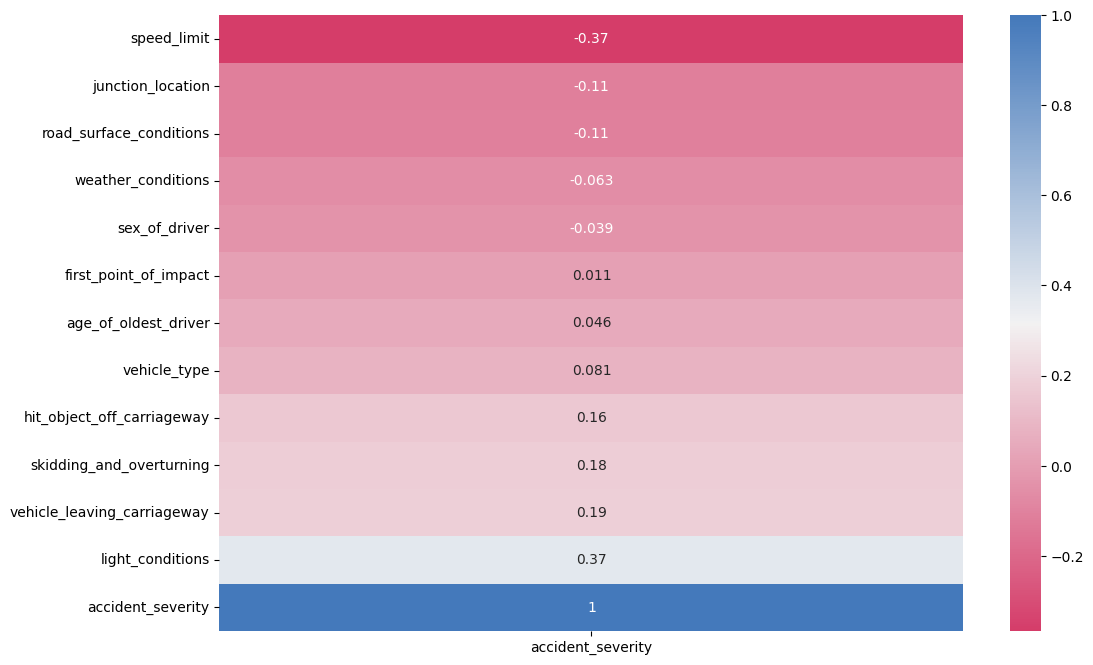

In [ ]:
print("Heatmap to observe correlation of accident_severity with other columns.")
pl.subplots(figsize=(12,8))
sns.heatmap(visualisationDataEncoded.corr()[['accident_severity']].sort_values('accident_severity'),annot=True,cmap=sns.diverging_palette(h_neg=0,h_pos=250,as_cmap=True))

From the heatmap I see high co-variance in 'light_conditions' , 'vehicle_leaving_carriageway' , 'skidding_and_overturning' and 'hit_object_off_carriageway'. The rest of the colums have weak correlation with accident severity but can't be neglected to. 

Distribution of accident_severity for speed limit


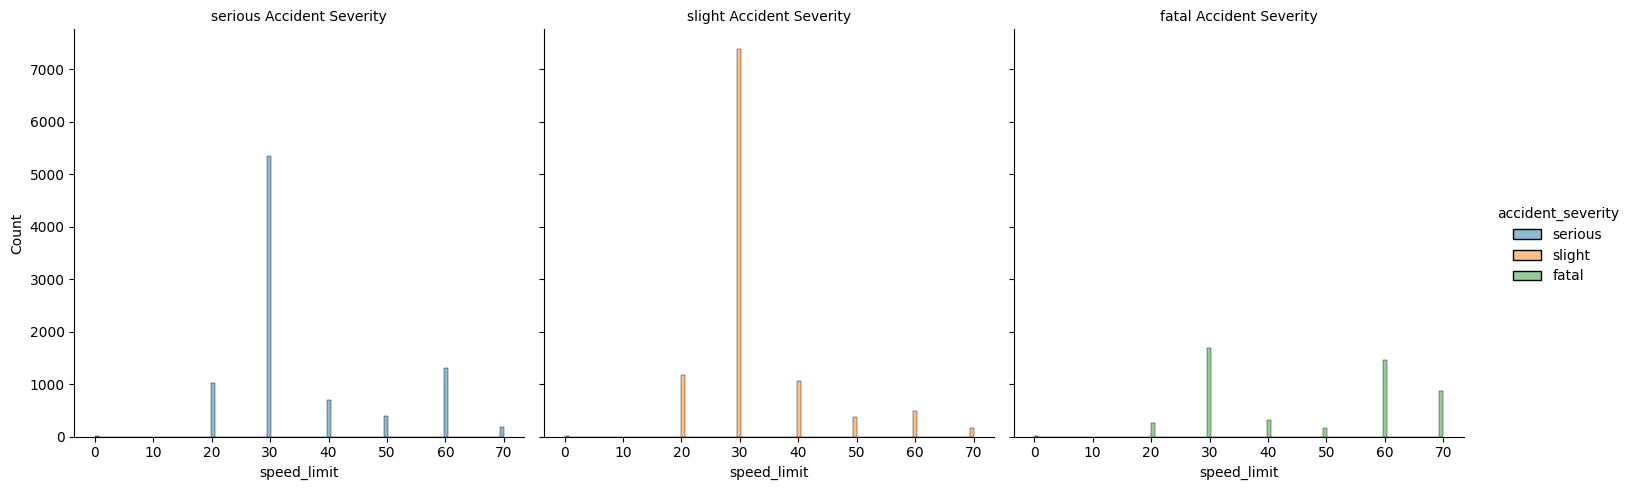

In [ ]:
print("Distribution of accident_severity for speed limit")
speedLimitFacetgrid = sns.displot(visualisationData, x='speed_limit',hue="accident_severity",col="accident_severity",kind='hist')
speedLimitFacetgrid.set_titles("{col_name} Accident Severity")

Distribution of accident_severity for light conditions


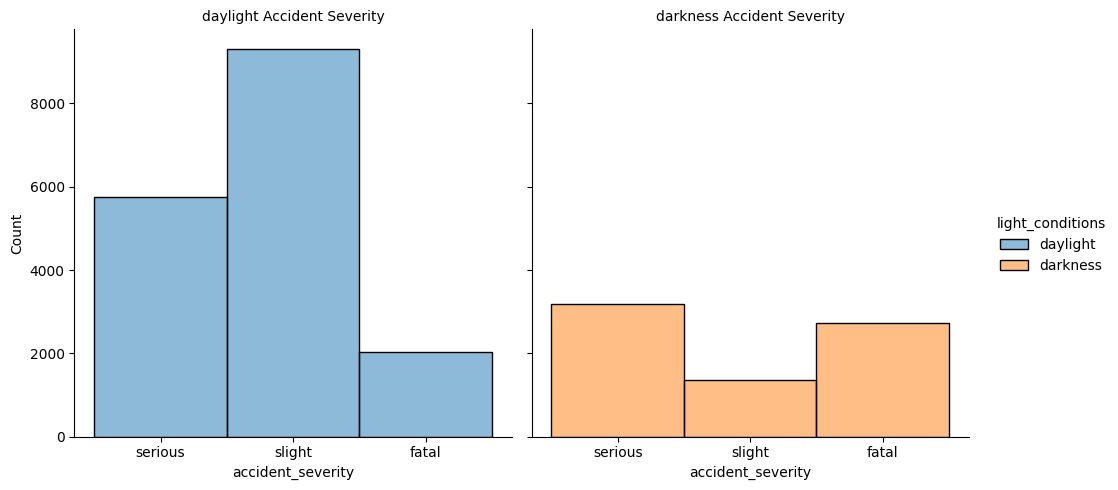

In [ ]:
print("Distribution of accident_severity for light conditions")
speedLimitFacetgrid = sns.displot(visualisationData, x='accident_severity',hue="light_conditions",col="light_conditions",kind='hist')
speedLimitFacetgrid.set_titles("{col_name} Accident Severity")

Distribution of accident_severity for Vehicle Leaving Carriageway


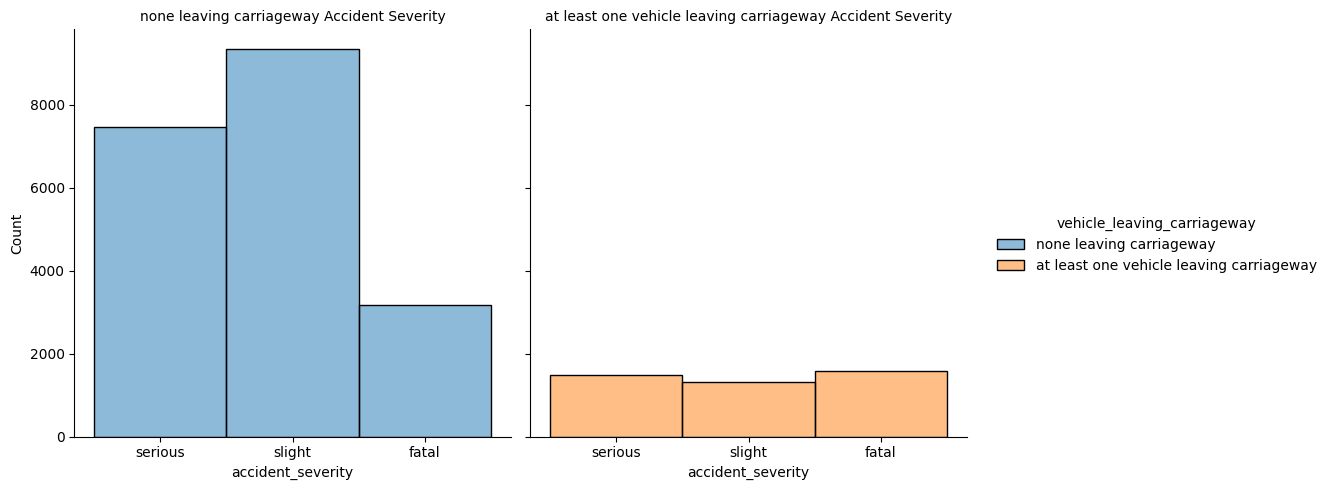

In [ ]:
print("Distribution of accident_severity for Vehicle Leaving Carriageway")
speedLimitFacetgrid = sns.displot(visualisationData, x='accident_severity',hue="vehicle_leaving_carriageway",col="vehicle_leaving_carriageway",kind='hist')
speedLimitFacetgrid.set_titles("{col_name} Accident Severity")

Distribution of accident_severity for Skidding and Overturning


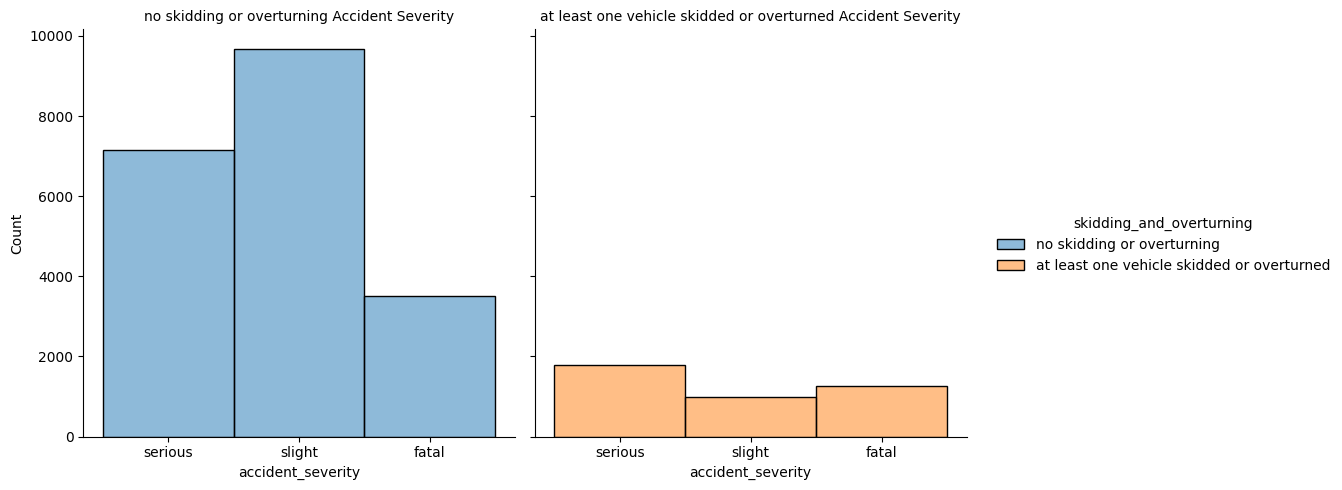

In [ ]:
print("Distribution of accident_severity for Skidding and Overturning")
speedLimitFacetgrid = sns.displot(visualisationData, x='accident_severity',hue="skidding_and_overturning",col="skidding_and_overturning",kind='hist')
speedLimitFacetgrid.set_titles("{col_name} Accident Severity")

Distribution of accident_severity for Hit Object Off carriageway.


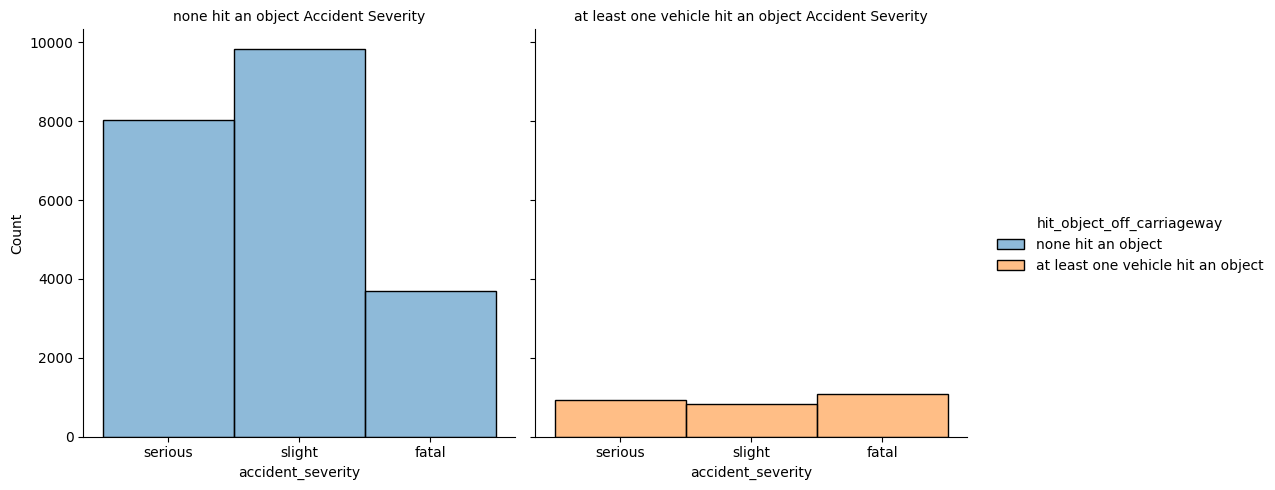

In [ ]:
print("Distribution of accident_severity for Hit Object Off carriageway.")
speedLimitFacetgrid = sns.displot(visualisationData, x='accident_severity',hue="hit_object_off_carriageway",col="hit_object_off_carriageway",kind='hist')
speedLimitFacetgrid.set_titles("{col_name} Accident Severity")

Distribution of accident_severity for Vehicle Type.


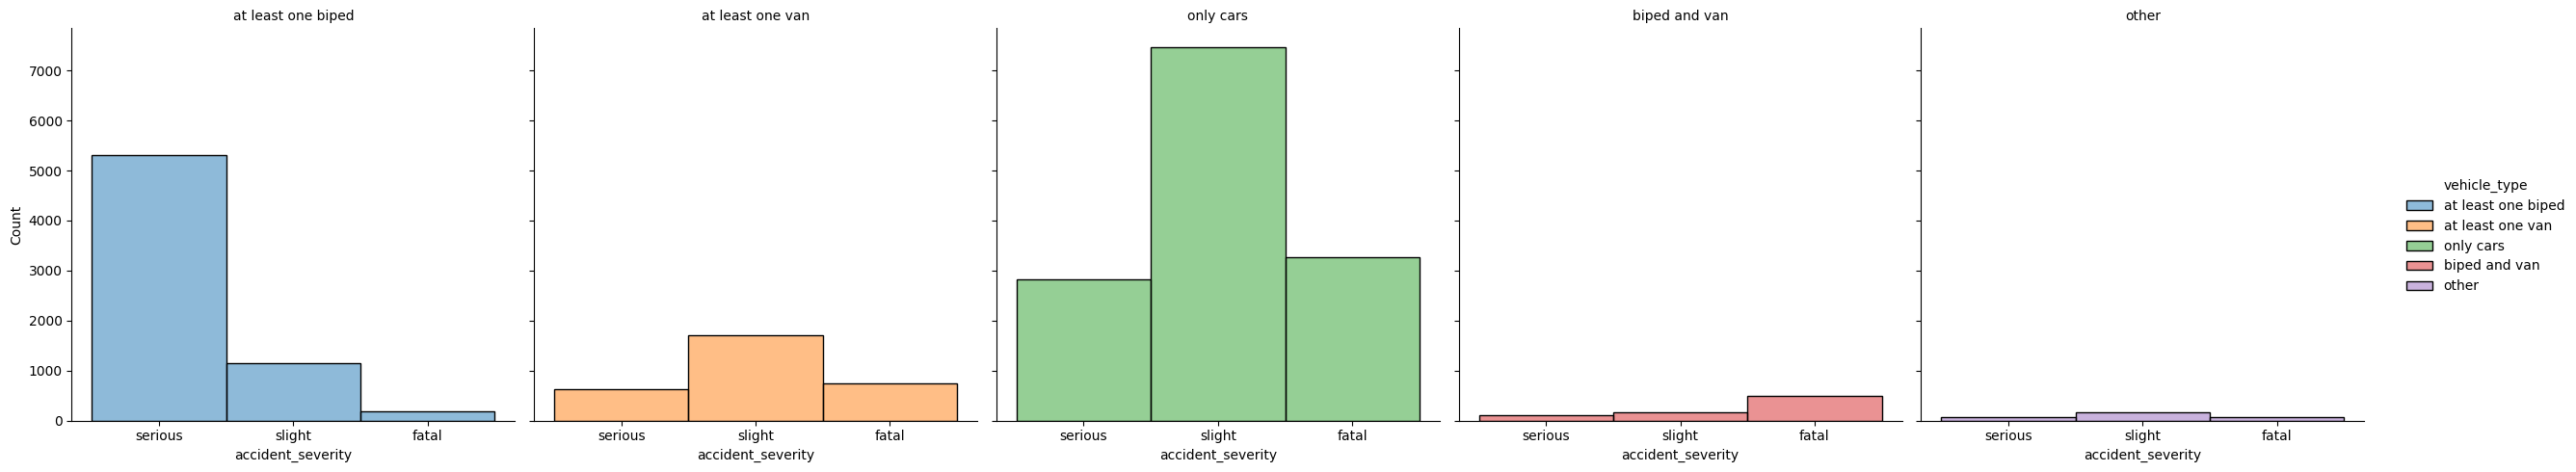

In [ ]:
print("Distribution of accident_severity for Vehicle Type.")
speedLimitFacetgrid = sns.displot(visualisationData, x='accident_severity',hue="vehicle_type",col="vehicle_type",kind='hist')
speedLimitFacetgrid.set_titles("{col_name}")

Distribution of accident_severity for Age.


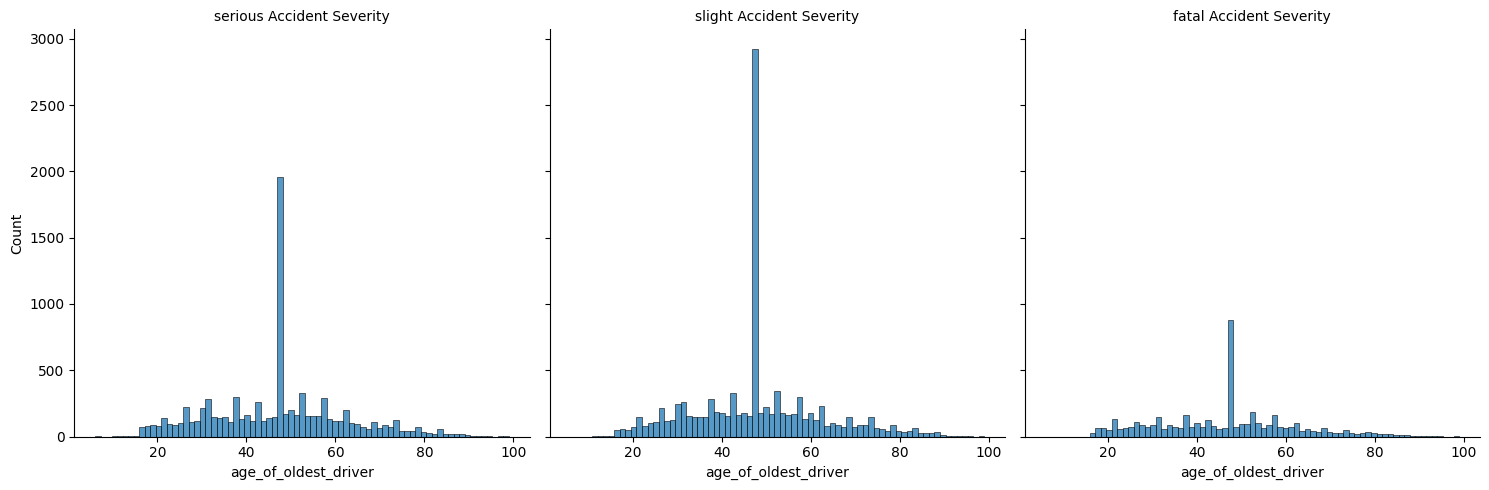

In [ ]:
print("Distribution of accident_severity for Age.")
speedLimitFacetgrid = sns.displot(visualisationData, x='age_of_oldest_driver',col="accident_severity",kind='hist')
speedLimitFacetgrid.set_titles("{col_name} Accident Severity")

## Setup Model instance for multi class classification task.

Setup methods for classification. Choose one with highest accuracy. Also, choice depends on features, complexity, problem and size of our dataset. I am assuming random forest classification would be better option than others. However, I am going to double check accuracy comparison to figure out on which model our dataset gets train well.



Random Forest Classification instance.

In [ ]:
rndmForestClassifier = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features="sqrt", min_samples_split=2, min_samples_leaf=1, class_weight="balanced")
rndmForestClassifier.fit(x_train,np.ravel(y_train,order='C'))
print("Score from Random forest classifier - ",rndmForestClassifier.score(x_test,y_test))

Score from Random forest classifier -  0.7447087776866284


Gradient Boosting Classification instance. 

In [ ]:
gradientBoostClassifier = GradientBoostingClassifier(learning_rate=1,n_estimators=1000,random_state=42)
gradientBoostClassifier.fit(x_train,np.ravel(y_train,order='C'))
print("Score from Gradient classifier - ",rndmForestClassifier.score(x_test,y_test))

Score from Gradient classifier -  0.7447087776866284


Stochastic Gradient Descent Classification instance. 

In [ ]:
sgdClassifier = SGDClassifier()
sgdClassifier.fit(x_train,np.ravel(y_train,order='C'))
print("Score from SGD classifier - ",sgdClassifier.score(x_test,y_test))

Score from SGD classifier -  0.6091878589007383


K-nearest neighbors Classification instance. 

In [ ]:
neighClasifer = KNeighborsClassifier(n_neighbors=100)
neighClasifer.fit(x_train,np.ravel(y_train,order='C'))
print("Score from KNighbors classifier - ",neighClasifer.score(x_test,y_test))

Score from KNighbors classifier -  0.6625102543068089


Multinomial Naive Bayes classification instance.

In [ ]:
nbclassifier = MultinomialNB()
nbclassifier.fit(x_train,np.ravel(y_train,order='C'))
print("Score from Naive Bayes classifier - ",nbclassifier.score(x_test,y_test))

Score from Naive Bayes classifier -  0.5940935192780968


## Models' Performance Evaluation.

Random Forest Classifier Performance metrics.

In [ ]:
y_predrndmForest = rndmForestClassifier.predict(x_test)
prediction_accuracy = accuracy_score(y_test, y_predrndmForest)
precisionScore = precision_score(y_test, y_predrndmForest, average='weighted')
recallRation = recall_score(y_test, y_predrndmForest, average='weighted')
f1Score = f1_score(y_test, y_predrndmForest, average='weighted')

print("Random Forest Classification model")
print("Prediction accuracy - ",prediction_accuracy)
print("Precision score - ",precisionScore)
print("Recall ration - ",recallRation)
print("R1 Score - ",f1Score)

Random Forest Classification model
Prediction accuracy -  0.7447087776866284
Precision score -  0.7688725000600715
Recall ration -  0.7447087776866284
R1 Score -  0.7488058418840438


Gradient Boosting Classifier Performance metrics.

In [ ]:
y_predgradientBoost = gradientBoostClassifier.predict(x_test)
prediction_accuracy = accuracy_score(y_test, y_predgradientBoost)
precisionScore = precision_score(y_test, y_predgradientBoost, average='weighted')
recallRation = recall_score(y_test, y_predgradientBoost, average='weighted')
f1Score = f1_score(y_test, y_predgradientBoost, average='weighted')

print("Gradient Boosting Classification model")
print("Prediction accuracy - ",prediction_accuracy)
print("Precision score - ",precisionScore)
print("Recall ration - ",recallRation)
print("R1 Score - ",f1Score)
print("\n")

Gradient Boosting Classification model
Prediction accuracy -  0.7307629204265792
Precision score -  0.7448049520968341
Recall ration -  0.7307629204265792
R1 Score -  0.7342213484904212




Stochastic Gradient Descent Classifier Performance metrics.

In [ ]:
y_predsgdClassifier = sgdClassifier.predict(x_test)
prediction_accuracy = accuracy_score(y_test, y_predsgdClassifier)
precisionScore = precision_score(y_test, y_predsgdClassifier, average='weighted')
recallRation = recall_score(y_test, y_predsgdClassifier, average='weighted')
f1Score = f1_score(y_test, y_predsgdClassifier, average='weighted')

print("Stochastic Gradient Descent Classification model")
print("Prediction accuracy - ",prediction_accuracy)
print("Precision score - ",precisionScore)
print("Recall ration - ",recallRation)
print("R1 Score - ",f1Score)

Stochastic Gradient Descent Classification model
Prediction accuracy -  0.6091878589007383
Precision score -  0.6235921962194956
Recall ration -  0.6091878589007383
R1 Score -  0.5558266751278657


K-nearest neighbors classifier Performance metrics.

In [ ]:
y_predneighClasifer = neighClasifer.predict(x_test)
prediction_accuracy = accuracy_score(y_test, y_predneighClasifer)
precisionScore = precision_score(y_test, y_predneighClasifer, average='weighted')
recallRation = recall_score(y_test, y_predneighClasifer, average='weighted')
f1Score = f1_score(y_test, y_predneighClasifer, average='weighted')

print("K-nearest neighbors model")
print("Prediction accuracy - ",prediction_accuracy)
print("Precision score - ",precisionScore)
print("Recall ration - ",recallRation)
print("R1 Score - ",f1Score)

K-nearest neighbors model
Prediction accuracy -  0.6625102543068089
Precision score -  0.6588612427749195
Recall ration -  0.6625102543068089
R1 Score -  0.6588749613916053


Multinomial Naive Bayes classifier Performance metrics.

In [ ]:
y_prednbclassifier = nbclassifier.predict(x_test)
prediction_accuracy = accuracy_score(y_test, y_prednbclassifier)
precisionScore = precision_score(y_test, y_prednbclassifier, average='weighted')
recallRation = recall_score(y_test, y_prednbclassifier, average='weighted')
f1Score = f1_score(y_test, y_prednbclassifier, average='weighted')

print("Multinomial Naive Bayes model")
print("Prediction accuracy - ",prediction_accuracy)
print("Precision score - ",precisionScore)
print("Recall ration - ",recallRation)
print("R1 Score - ",f1Score)

Multinomial Naive Bayes model
Prediction accuracy -  0.5940935192780968
Precision score -  0.6046368309341622
Recall ration -  0.5940935192780968
R1 Score -  0.592818053741165


Feature selection.

<Axes: >

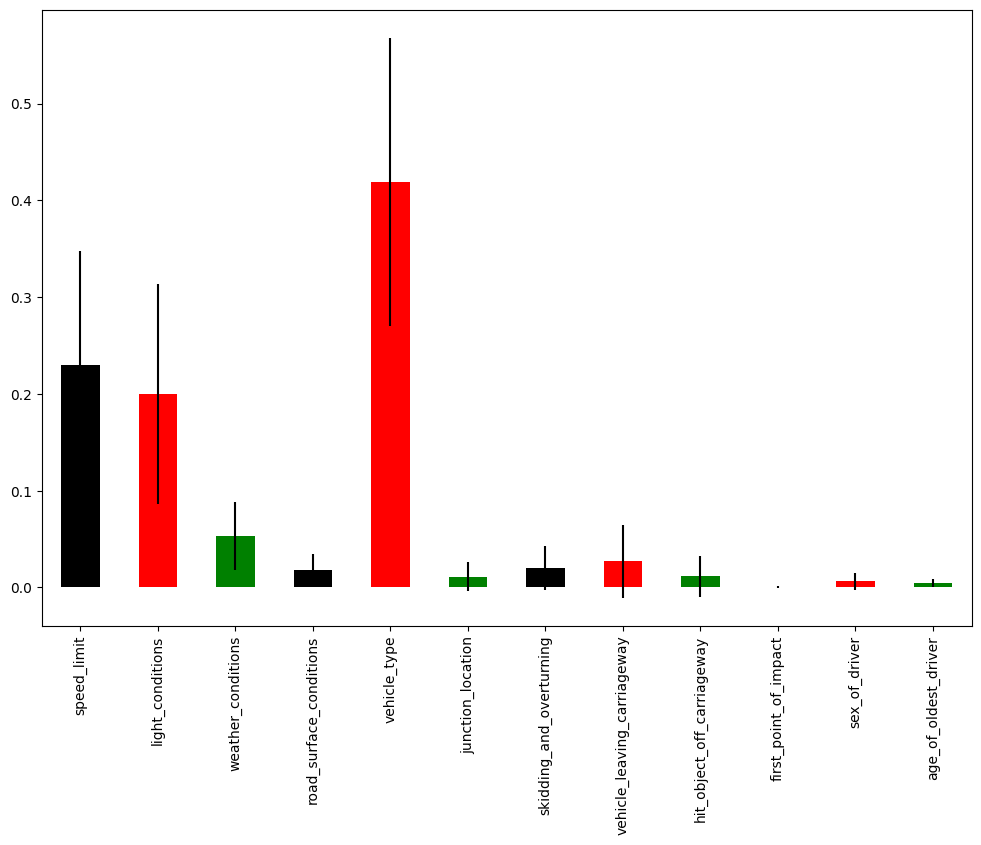

In [ ]:
feature_names = x_train.columns
fImportances = rndmForestClassifier.feature_importances_
featureImportances = pd.Series(fImportances, index=feature_names)
standardDeviation = np.std([tree.feature_importances_ for tree in rndmForestClassifier.estimators_], axis=0)
fig, ax = pl.subplots(figsize=(12,8))
featureImportances.plot.bar(yerr=standardDeviation, ax=ax,color=['black','red','green'])

In [ ]:
#Feature selection to perfrom accuracy
indices = np.argsort(featureImportances)[::-1]
indices

print("Feature ranking:")
for col in x_train.columns:
    print("Feature importance of ",col," ",featureImportances[indices[col]])

Feature ranking:
Feature importance of  speed_limit   0.0007330155759595387
Feature importance of  light_conditions   0.004204481227907537
Feature importance of  weather_conditions   0.006182044490269079
Feature importance of  road_surface_conditions   0.010855129062092817
Feature importance of  vehicle_type   0.011383365015630914
Feature importance of  junction_location   0.017534174530311177
Feature importance of  skidding_and_overturning   0.019844751340127562
Feature importance of  vehicle_leaving_carriageway   0.02703064655781607
Feature importance of  hit_object_off_carriageway   0.05353021716994924
Feature importance of  first_point_of_impact   0.19972589939484187
Feature importance of  sex_of_driver   0.2298131378860782
Feature importance of  age_of_oldest_driver   0.41916313774901615


In [ ]:
featureSelector = SelectKBest(score_func=f_classif, k=6)
featureSelector.fit(x_train,np.ravel(y_train,order='C'))
chosenFeatures = featureSelector.get_support(indices=True)
selected_feature_names = x_train.columns[chosenFeatures]
print(selected_feature_names)

Index(['speed_limit', 'light_conditions', 'weather_conditions', 'vehicle_type',
       'skidding_and_overturning', 'vehicle_leaving_carriageway'],
      dtype='object')


In [ ]:
rndmForestClassifierSelectedFeature = rndmForestClassifier.fit(x_train[selected_feature_names],np.ravel(y_train,order='C'))
print("Score after best feature selection - ",rndmForestClassifierSelectedFeature.score(x_test[selected_feature_names],y_test))

Score after best feature selection -  0.7448728465955702


Random Under Sampling.

In [ ]:
randomUnderSampling = RandomUnderSampler(random_state=43)
x_train_samplingData , y_train_samplingData = randomUnderSampling.fit_resample(x_train[selected_feature_names], y_train)
rndmForestClassifierSelectedFeature.fit(x_train_samplingData[selected_feature_names], y_train_samplingData)
print("Score after random under sampling - ",rndmForestClassifierSelectedFeature.score(x_test[selected_feature_names],y_test))

Score after random under sampling -  0.7448728465955702


# Confusion Matrix for Random Forest Classifier.

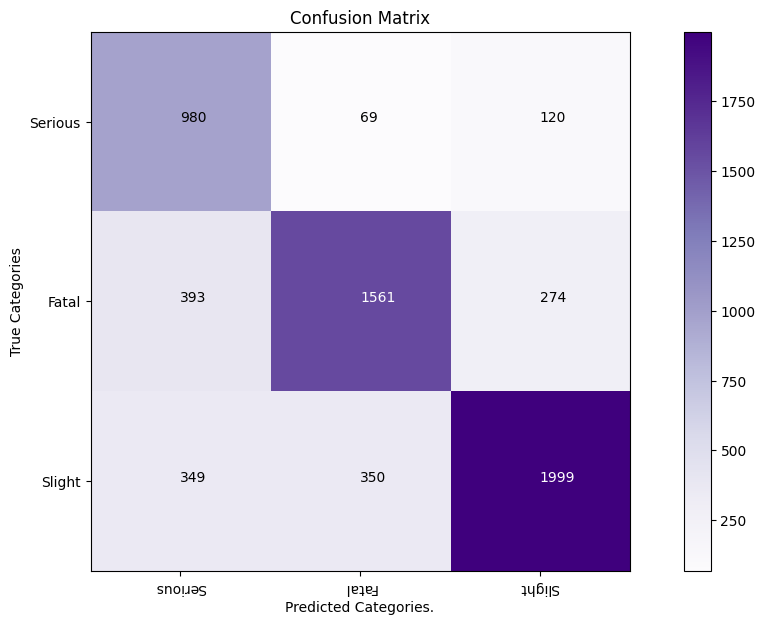

In [ ]:
y_predOptimized = rndmForestClassifierSelectedFeature.predict(x_test[selected_feature_names])

#Common function for confusion matrix.
def visualizeConfusionMatrix(prediction_class):
  confusionMatrix = confusion_matrix(y_test,prediction_class)
  targetCategories = ['Serious','Fatal','Slight']
  pl.figure(figsize=(14,7))
  pl.imshow(confusionMatrix,cmap=pl.cm.Purples)
  pl.title('Confusion Matrix')
  pl.colorbar()
  ticksArray = np.arange(len(targetCategories))
  pl.xticks(ticksArray, targetCategories, rotation=180)
  pl.yticks(ticksArray, targetCategories)
  pl.xlabel('Predicted Categories.')
  pl.ylabel('True Categories')

  cmThreshold = confusionMatrix.max() / 2.
  for i, j in np.ndindex(confusionMatrix.shape):
      pl.text(j, i, format(confusionMatrix[i, j], 'd'), color="white" if confusionMatrix[i, j] > cmThreshold else "black")
  pl.show()


visualizeConfusionMatrix(y_predOptimized)  

Performance metrices after improving Random Forest Classifier's performance.

In [ ]:
prediction_accuracy = accuracy_score(y_test, y_predOptimized)
precisionScore = precision_score(y_test, y_predOptimized, average='weighted')
recallRation = recall_score(y_test, y_predOptimized, average='weighted')
f1Score = f1_score(y_test, y_predOptimized, average='weighted')

print("After model optimization ")
print("Prediction accuracy - ",prediction_accuracy)
print("Precision score - ",precisionScore)
print("Recall Score - ",recallRation)
print("R1 Score - ",f1Score)

After model optimization 
Prediction accuracy -  0.7448728465955702
Precision score -  0.7671183665799913
Recall Score -  0.7448728465955702
R1 Score -  0.748859696642735


## Comparison with trivial baseline.

In [ ]:
majorCategory = 2 #Majority classifier is slight and was encoded as digit 2. 
y_test_majorCategory = np.full(y_test.shape, fill_value=majorCategory)

accuracyByMajority = accuracy_score(y_test,y_test_majorCategory)
print("Accuracy of majority class classifier: {:.3f}".format(accuracyByMajority))

Accuracy of majority class classifier: 0.443


## Multilayer Perceptron Neural Network

In [ ]:
MultilayerPerceptronNetwork = Sequential()
MultilayerPerceptronNetwork.add(Dense
                              (64,
                               input_dim=x_train_samplingData.shape[1],
                               activation='relu'))
MultilayerPerceptronNetwork.add(
                              Dropout(0.5)
                              )
MultilayerPerceptronNetwork.add(Dense(
                              32,
                              activation='relu'))
MultilayerPerceptronNetwork.add(Dropout(0.5))
MultilayerPerceptronNetwork.add(Dense(
                              3,
                              activation='softmax')
)

MultilayerPerceptronNetwork.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history = MultilayerPerceptronNetwork.fit(x_train[selected_feature_names], np.ravel(y_train,order='C'), validation_data=(x_test[selected_feature_names], np.ravel(y_test,order='C')), epochs=100, batch_size=32)
loss, accuracy = MultilayerPerceptronNetwork.evaluate(x_test[selected_feature_names],np.ravel(y_test,order='C'))
print('Accuracy from Multi-Layer Perceptron Neural Network: %.4f%%' % (accuracy*100))


Epoch 1/100
762/762 [==============================] - 6s 4ms/step - loss: 1.3342 - accuracy: 0.4299 - val_loss: 1.0227 - val_accuracy: 0.4852
Epoch 2/100
762/762 [==============================] - 3s 4ms/step - loss: 1.0215 - accuracy: 0.4980 - val_loss: 0.9510 - val_accuracy: 0.6115
Epoch 3/100
762/762 [==============================] - 3s 4ms/step - loss: 0.9688 - accuracy: 0.5593 - val_loss: 0.8394 - val_accuracy: 0.6612
Epoch 4/100
762/762 [==============================] - 3s 4ms/step - loss: 0.8632 - accuracy: 0.6253 - val_loss: 0.7504 - val_accuracy: 0.6719
Epoch 5/100
762/762 [==============================] - 3s 4ms/step - loss: 0.8029 - accuracy: 0.6584 - val_loss: 0.7107 - val_accuracy: 0.7267
Epoch 6/100
762/762 [==============================] - 3s 4ms/step - loss: 0.7744 - accuracy: 0.6829 - val_loss: 0.7000 - val_accuracy: 0.7290
Epoch 7/100
762/762 [==============================] - 4s 5ms/step - loss: 0.7619 - accuracy: 0.6958 - val_loss: 0.6891 - val_accuracy: 0.7368

Performance Metrics for Multilayer Perceptron Neural Network and Majority Classifier Accuracy comparison.

In [ ]:
y_predMultilayerPerceptron = MultilayerPerceptronNetwork.predict(x_test[selected_feature_names])
y_predMultilayerPerceptronClass = np.argmax(y_predMultilayerPerceptron,axis=1)

predictionAccuracy = accuracy_score(y_test,y_predMultilayerPerceptronClass)
precisionScore = precision_score(y_test,y_predMultilayerPerceptronClass,average='macro')
recallRation = recall_score(y_test,y_predMultilayerPerceptronClass,average='macro')
f1Score = f1_score(y_test,y_predMultilayerPerceptronClass,average='macro')

print("Multi-Layer Perceptron Neural Network - ")
print("Prediction accuracy - ",predictionAccuracy)
print("Precision score - ",precisionScore)
print("Recall ration - ",recallRation)
print("R1 Score - ",f1Score)
print("Accuracy of majority class classifier: {:.4f}%".format(accuracyByMajority*100))

191/191 [==============================] - 0s 1ms/step
Multi-Layer Perceptron Neural Network - 
Prediction accuracy -  0.7420836751435603
Precision score -  0.7266526710305786
Recall ration -  0.7541346621566637
R1 Score -  0.7316340944656355
Accuracy of majority class classifier: 44.2658%


Confusion matrix for Multilayer Perceptron Neural Network.

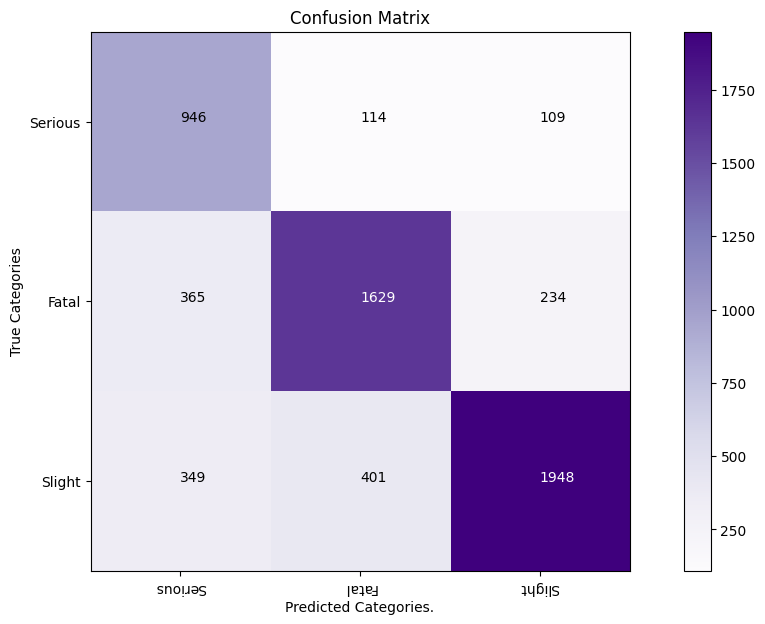

In [ ]:
visualizeConfusionMatrix(y_predMultilayerPerceptronClass)

## Convolutional Neural Network

In [ ]:
convolutionalNeuralNetwork = Sequential()

convolutionalNeuralNetwork.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train[selected_feature_names].shape[1], 1)))
convolutionalNeuralNetwork.add(MaxPooling1D(pool_size=2))
convolutionalNeuralNetwork.add(Flatten())
convolutionalNeuralNetwork.add(Dense(50, activation='relu'))
convolutionalNeuralNetwork.add(Dense(3, activation='softmax'))

convolutionalNeuralNetwork.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

convolutionalNeuralNetwork.fit(x_train[selected_feature_names], keras.utils.to_categorical(y_train,3), epochs=30, batch_size=32)

score = convolutionalNeuralNetwork.evaluate(x_test[selected_feature_names], keras.utils.to_categorical(y_test,3), verbose=0)
print('Accuracy from Convolutional Neural Network: %.4f%%' % (score[1]*100))

Epoch 1/30
762/762 [==============================] - 6s 4ms/step - loss: 0.7694 - accuracy: 0.6823
Epoch 2/30
762/762 [==============================] - 3s 3ms/step - loss: 0.6994 - accuracy: 0.7254
Epoch 3/30
762/762 [==============================] - 3s 3ms/step - loss: 0.6890 - accuracy: 0.7293
Epoch 4/30
762/762 [==============================] - 3s 3ms/step - loss: 0.6818 - accuracy: 0.7336
Epoch 5/30
762/762 [==============================] - 3s 4ms/step - loss: 0.6749 - accuracy: 0.7344
Epoch 6/30
762/762 [==============================] - 3s 3ms/step - loss: 0.6685 - accuracy: 0.7365
Epoch 7/30
762/762 [==============================] - 3s 3ms/step - loss: 0.6634 - accuracy: 0.7374
Epoch 8/30
762/762 [==============================] - 3s 3ms/step - loss: 0.6594 - accuracy: 0.7373
Epoch 9/30
762/762 [==============================] - 5s 6ms/step - loss: 0.6555 - accuracy: 0.7397
Epoch 10/30
762/762 [==============================] - 3s 4ms/step - loss: 0.6525 - accuracy: 0.7420

Performance metrices for Convolutional Neural Network and comparison of majority classifier accuracy.

In [ ]:
y_predConvolutional = convolutionalNeuralNetwork.predict(x_test[selected_feature_names])
y_predConvolutionalClass = np.argmax(y_predConvolutional,axis=1)

predictionAccuracy = accuracy_score(y_test,y_predConvolutionalClass)
precisionScore = precision_score(y_test,y_predConvolutionalClass,average='macro')
recallRation = recall_score(y_test,y_predConvolutionalClass,average='macro')
f1Score = f1_score(y_test,y_predConvolutionalClass,average='macro')

print("Multi-Layer Perceptron Neural Network - ")
print("Prediction accuracy - ",predictionAccuracy)
print("Precision score - ",precisionScore)
print("Recall ration - ",recallRation)
print("R1 Score - ",f1Score)
print("Accuracy of majority class classifier: {:.4f}%".format(accuracyByMajority*100))

191/191 [==============================] - 0s 2ms/step
Multi-Layer Perceptron Neural Network - 
Prediction accuracy -  0.7509433962264151
Precision score -  0.7380810869578234
Recall ration -  0.7685993309001504
R1 Score -  0.742809568224597
Accuracy of majority class classifier: 44.2658%


Confusion Matrix for convolutional matrix.

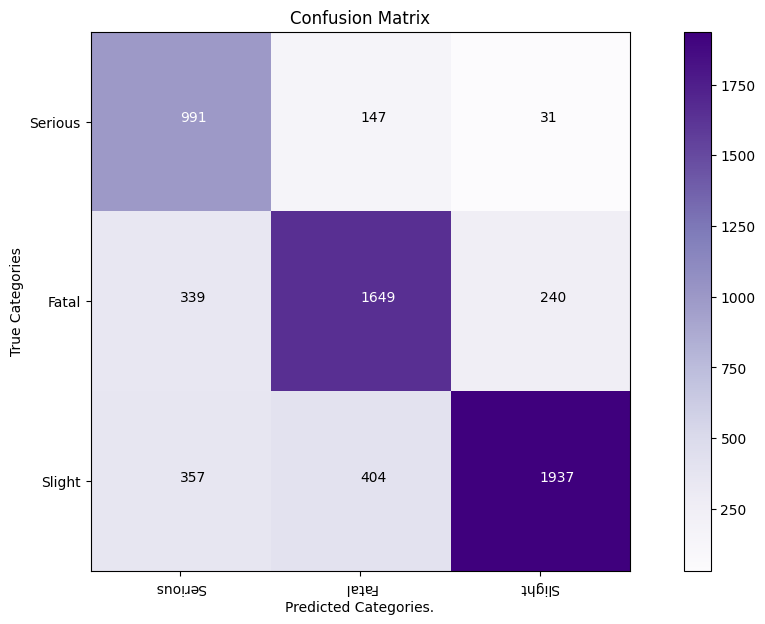

In [ ]:
visualizeConfusionMatrix(y_predConvolutionalClass)